In [1]:
%load_ext autoreload
%autoreload 2

import os
from travel import init_travel
init_travel()

# Test parsing method

In [9]:
import spacy
from travel.model.grounding import SpatialVisualFilter

nlp = spacy.load('en_core_web_md')
# test_questions = [
#     "Are the cherry tomatoes cut?",
#     "Are the cherry tomatoes not cut?",
#     "Are there cherry tomatoes in the bowl?",
#     "Are there any cherry tomatoes that are not in the bowl?"
# ]
test_questions = [
    "Is the garlic clove on the cutting board?",
    "Is the heat on?",
    "Is the heat on medium?",
    "Is the apple in a hand?",
    "Is the apple in someone's left hand?",
    "Is there tuna in the bowl that is not drained?",
    "Is the tablet on the table?",
    "Is the cleanser container somewhere not on the table?"
]

SpatialVisualFilter.parse_questions_for_spatial_attention_filter(nlp, test_questions)

[(True, 'cutting board', 'Is the garlic clove in the image?'),
 (True, None, 'Is the heat on?'),
 (True, None, 'Is the heat on medium?'),
 (True, None, 'Is the apple in a hand?'),
 (True, None, "Is the apple in someone's left hand?"),
 (True, 'bowl', 'Is there tuna in the image that is not drained?'),
 (True, 'table', 'Is the tablet in the image?'),
 (False, 'table', 'Is the cleanser container somewhere in the image?')]

# Test full spatial filter

In [2]:
from PIL import Image
import spacy
import torch
from travel.model.grounding import SpatialVisualFilter

visual_filter = SpatialVisualFilter(rephrase_questions=True, device="cuda:1" if torch.cuda.device_count() >= 2 else None)

/home/sstorks/.cache/pypoetry/virtualenvs/travel-nQET-zRt-py3.10/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
`low_cpu_mem_usage` was None, now set to True since model is quantized.


In [3]:
nlp = spacy.load('en_core_web_md')

# questions = ["Are there cherry tomatoes in the bowl?", 
#              "Are there any cherry tomatoes that are not in the bowl?"]
# frames = [Image.open("demo_images/demo_frame2.png"),
#           Image.open("demo_images/demo_frame2.png")]

# questions = ["Is the knife dirty?"]
# frames = [Image.open("demo_images/demo_frame1.png")]

# questions = ["Is the plate clean?",
#              "Is the plate clean?"]
# frames = [Image.open("/nfs/turbo/coe-chaijy/sstorks/simulation_informed_pcr4nlu/TRAVEl/saved_results/vqa_mistake_detection/captaincook4d/VQG2VQA_captaincook4d_llava-1.5-7b-hf_20240617181122/VQA_cache_val_worker1of1/frames/frame_1_20_11_b4cf361c-3f3a-40aa-8ce8-b292073d741b.jpg"),
#           Image.open("/nfs/turbo/coe-chaijy/sstorks/simulation_informed_pcr4nlu/TRAVEl/saved_results/vqa_mistake_detection/captaincook4d/VQG2VQA_captaincook4d_llava-1.5-7b-hf_20240617181122/VQA_cache_val_worker1of1/frames/frame_9_19_3_15602923-6cff-466b-a6dc-0914d5473bd6.jpg")]

questions = ["Is the tablet on the table?"]
frames = [Image.open('saved_results/vqa_mistake_detection/ego4d/VQG2VQA_ego4d_debug_llava-1.5-7b-hf_spatial1.0_20240624115037/VQA_cache_val_worker1of1/frames/frame_f6eb8e9b-a925-4112-9eec-32393192e435-39-easyneg_MisalignSRL_ARG1_c8f8ebf1-5613-4f4a-802c-ada5e4c4b651_127.0138486_51b16362-c1d0-481e-b521-6d8590ad4c92.jpg')]

new_frames, new_questions = visual_filter(nlp, frames, questions)

running detection (cuda:0): 100%|██████████| 1/1 [00:00<00:00,  1.06it/s]

[{'scores': tensor([0.3292], device='cuda:0'), 'labels': tensor([0], device='cuda:0'), 'boxes': tensor([[357.1875,  15.3516, 952.5000, 451.8750]], device='cuda:0')}]


## Show new frames

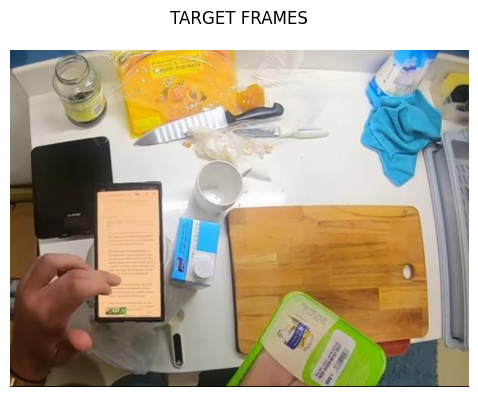

In [4]:
import matplotlib.pyplot as plt

# Assuming new_frames is a list of image data
fig, axarr = plt.subplots(1, len(new_frames), figsize=(22, 4))
fig.suptitle("TARGET FRAMES")

# Ensure axarr is always iterable
if len(new_frames) == 1:
    axarr = [axarr]

for frame, ax in zip(new_frames, axarr):
    if frame is not None:
        ax.imshow(frame)
        ax.axis('off')  # Hide the axes for better visualization

plt.tight_layout()
plt.show()

## Show new questions

In [6]:
from pprint import pprint

pprint(new_questions)

['Is the bowl empty?']
